##Stroke Prediction*





## Описание задачи

Датасет содержит информацию о пациетнах, на основании которой предполагается предсказать возможность возникновения инсульта.

## Оригинальное описание

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

##Оригинальное описание признаков
1)id: уникальный идентификатор

2) gender: "Male", "Female" or "Other" - пол пациента

3) age: возраст пациента

4) hypertension:наличие гипертонии: 0 - у пациента нет гипертонии, 1 - у пациента зафиксирована гипертония

5) heart_disease: наличие сердечных заболеваний: 0 - у пациента нет сердечных заболеваний, 1 - у пациента зафиксированы сердечные заболевания

6) ever_married:состоит в браке: "No" или "Yes"

7) work_type: тип занятости: "children" - ребенок, "Govt_jov" - работает, "Never_worked"- никогда не работал, "Private" - частный работник, "Self-employed" - самозанятый

8) Residence_type: Тип местности, в который проживает пациент "Rural" - сельская, "Urban" - городская

9) avg_glucose_level: уровень глюкозы в крови

10) bmi: индекс массы тела

11) smoking_status: отношение к курению "formerly smoked" - бросил курить, "never smoked" - никогда не курил, "smokes" -курит, "Unknown" - нет данных

12) stroke: инсульт 1 - у пациента зафиксирован инсульт, 0 - не зафиксирован

##Разведочный анализ

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
import sklearn

##Загружаем данные


In [18]:
url = "https://raw.githubusercontent.com/gordushha/ML-course-UNN/main/healthcare-dataset-stroke-data.csv"
data_raw = pd.read_csv(url)

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одной квартире) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [19]:
data_raw.shape

(5110, 12)

Число объектов - 5110; количество признаков - 12; число классов -2 (наличие или отсутствие инсульта)

In [20]:
data_raw

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Метод `data_raw.head()` отображает первые строки (по умолчанию, 5 строк) таблицы

In [21]:
data_raw.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Последние строки:

In [22]:
data_raw.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [23]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Визуализация и описательная статистика

Рассмотрим предварительную зависимость наличия инсульта от некоторых данных о пациенте

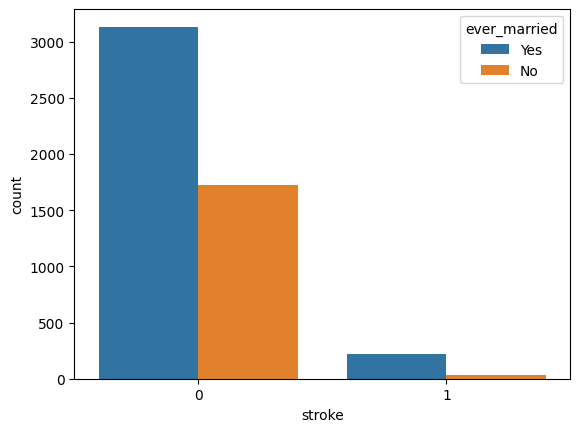

In [24]:
sns.countplot(x = 'stroke', hue = 'ever_married', data = data_raw)
pass

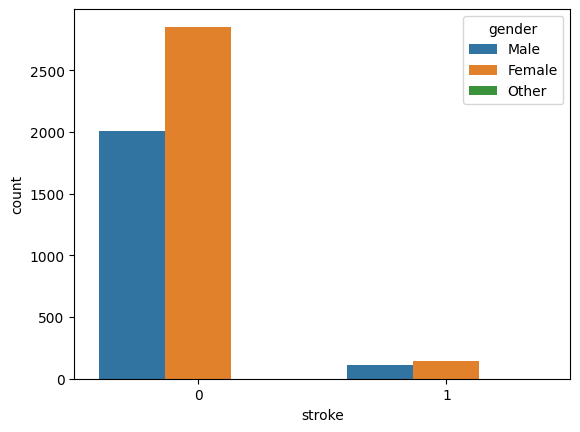

In [25]:
sns.countplot(x = 'stroke', hue = 'gender', data = data_raw)
pass

В опросе приняло участие больше женщин, чем мужчин

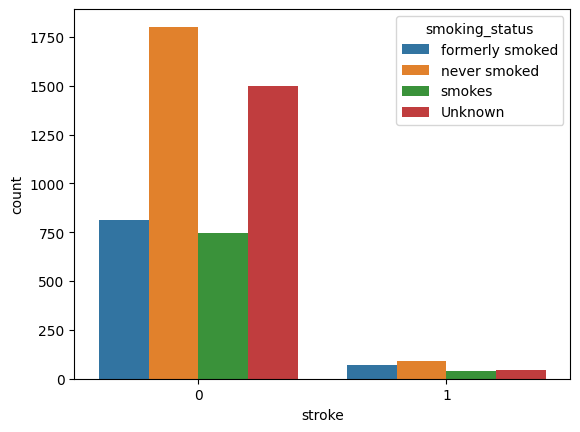

In [26]:
sns.countplot(x = 'stroke', hue = 'smoking_status', data = data_raw)
pass

Многие пациенты не предоставили данные о своем отношении к курению, также многие сообщили, что никогда не курили

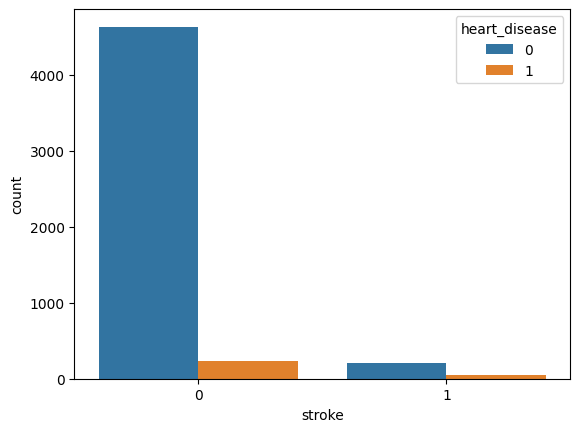

In [27]:
sns.countplot(x = 'stroke', hue = 'heart_disease', data = data_raw)
pass

Большинство пациентов не страдают от сердечных заболеваний



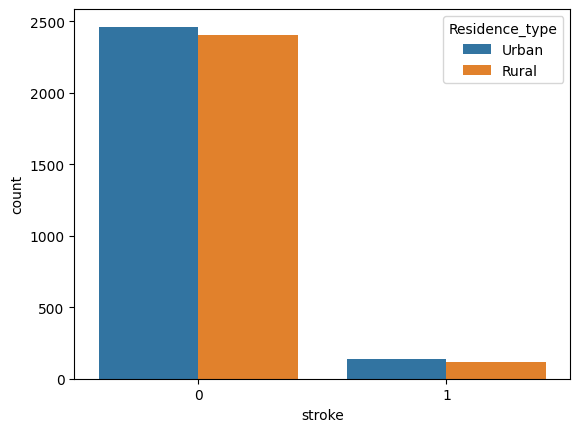

In [28]:
sns.countplot(x = 'stroke', hue = 'Residence_type', data = data_raw)
pass

Число людей, проживающих в городской и сельской местности примерно одинаковое


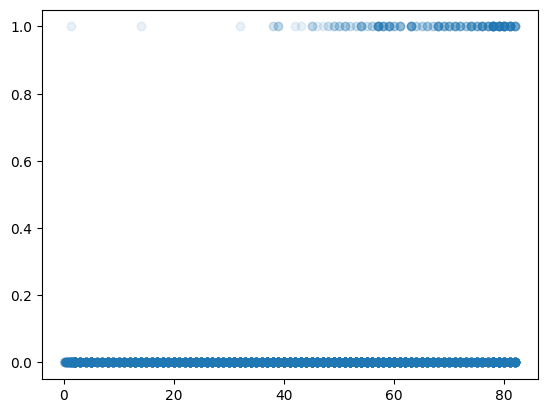

In [29]:
plt.scatter(data_raw['age'], data_raw['stroke'], alpha = 0.1)

Как мы видим на диаграмме,  инсульт встречается чаще среди пациентов более старшего возраста

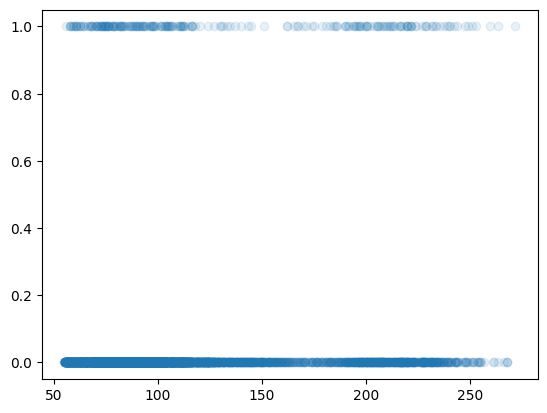

In [30]:
plt.scatter(data_raw['avg_glucose_level'], data_raw['stroke'], alpha = 0.1)

Как мы видим на диаграмме, инсультом страдают реже пациенты со средним уровнем глюкозы в крови

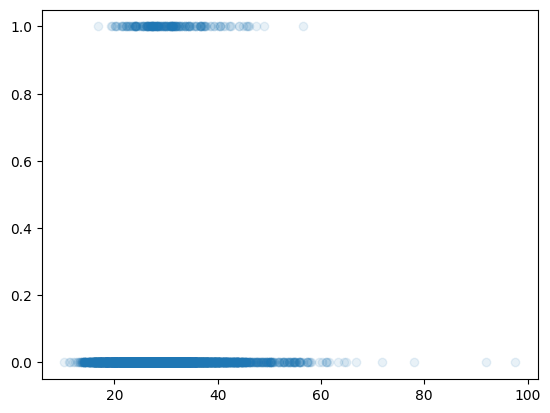

In [31]:
plt.scatter(data_raw['bmi'], data_raw['stroke'], alpha = 0.1)

На диаграмме видим, что люди, страдающие ожирением больше подвержены инсульту, чем люди с нормальным и недостаточным весом.

##Подготовка датасета

In [35]:
data_raw=data_raw.drop(['id'], axis=1)

Является ли наша статистика сбалансированной:

<Axes: xlabel='stroke', ylabel='count'>

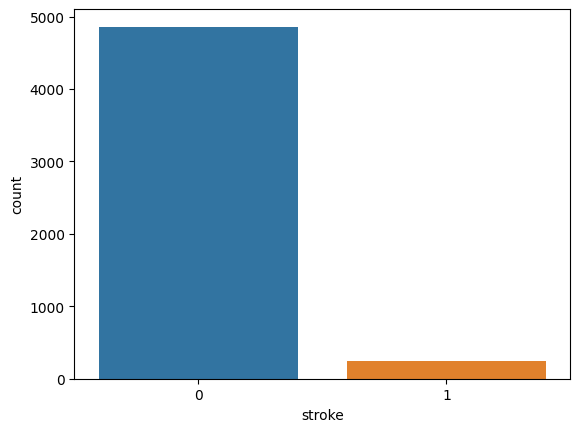

In [36]:
sns.countplot(x = 'stroke', data = data_raw)

Многие из пациентов, прошедших опрос, не сталкивались с инсультом

В датасете присутствуют следующие типы:
1. Gender, Hypertension, Heart Disease, Ever Married, Stroke, Residense Type - бинарные признаки;
2. Id, Age, Awd Glucose Level, BMI - числовые признаки;
3. Work Type, Smoking Status - категориальные признаки.

Проверим датасет на наличие пропущенных значений:


In [43]:
data_raw['bmi'].fillna(data_raw['bmi'].median(axis = 0), axis = 0, inplace = True)
data_raw.fillna(data_raw.mode().iloc[0], inplace = True)

In [46]:
data_raw.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Обработка бинарных признаков

Изменим признаки gender, ever_married, Residence_type

In [48]:
data_raw['gender'] = pd.factorize(data_raw['gender'])[0]
data_raw['ever_married'] = pd.factorize(data_raw['ever_married'])[0]
data_raw['Residence_type'] = pd.factorize(data_raw['Residence_type'])[0]

In [49]:
data_raw

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,Private,0,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,0,Self-employed,1,202.21,28.1,never smoked,1
2,0,80.0,0,1,0,Private,1,105.92,32.5,never smoked,1
3,1,49.0,0,0,0,Private,0,171.23,34.4,smokes,1
4,1,79.0,1,0,0,Self-employed,1,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,0,Private,0,83.75,28.1,never smoked,0
5106,1,81.0,0,0,0,Self-employed,0,125.20,40.0,never smoked,0
5107,1,35.0,0,0,0,Self-employed,1,82.99,30.6,never smoked,0
5108,0,51.0,0,0,0,Private,1,166.29,25.6,formerly smoked,0


Обработка категориальных признаков

In [50]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 439.3+ KB


In [51]:
data_raw['gender'] = data_raw['gender'].astype('category')
data_raw['ever_married'] = data_raw['ever_married'].astype('category')
data_raw['work_type'] = data_raw['work_type'].astype('category')
data_raw['Residence_type'] = data_raw['Residence_type'].astype('category')
data_raw['smoking_status'] = data_raw['smoking_status'].astype('category')

In [52]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   int64   
 3   heart_disease      5110 non-null   int64   
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                5110 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 265.4 KB


In [53]:
work_type_dummies = pd.get_dummies(data_raw['work_type'])
data_raw = pd.concat((data_raw, work_type_dummies), axis = 1)
data_raw = data_raw.drop(['work_type'], axis = 1)
smoking_status_dummies = pd.get_dummies(data_raw['smoking_status'])
data_raw = pd.concat((data_raw, smoking_status_dummies), axis = 1)
data_raw = data_raw.drop(['smoking_status'], axis = 1)

In [54]:
data_raw

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,0,67.0,0,1,0,0,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,1,61.0,0,0,0,1,202.21,28.1,1,0,0,0,1,0,0,0,1,0
2,0,80.0,0,1,0,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,1,49.0,0,0,0,0,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1,79.0,1,0,0,1,174.12,24.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,0,0,83.75,28.1,0,0,0,1,0,0,0,0,1,0
5106,1,81.0,0,0,0,0,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,1,35.0,0,0,0,1,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,0,51.0,0,0,0,1,166.29,25.6,0,0,0,1,0,0,0,1,0,0


## Визуализация

 Веведем матрицу корреляции, чтобы выявить зависимость признаков между собой

In [69]:
corr_mat = data_raw.corr()
corr_mat

<ipython-input-69-ee351f3bb90f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data_raw.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
age,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257,0.130013,-0.078653,0.116534,0.327989,-0.634215,-0.378231,0.236897,0.119307,0.073133
hypertension,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904,0.017685,-0.021608,-0.005413,0.115442,-0.129506,-0.141501,0.058853,0.065063,0.031240
heart_disease,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914,0.001330,-0.015712,0.000027,0.086760,-0.091634,-0.066731,0.066804,-0.021856,0.044049
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945,0.013845,-0.014675,0.016588,0.062694,-0.102250,-0.095131,0.068111,0.023885,0.017646
bmi,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110,0.077856,-0.028327,0.203886,0.070160,-0.442102,-0.264915,0.103533,0.107636,0.084392
stroke,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000,0.002677,-0.014882,0.011888,0.062168,-0.083869,-0.055892,0.064556,-0.004129,0.008939
Govt_job,0.130013,0.017685,0.001330,0.013845,0.077856,0.002677,1.000000,-0.025258,-0.444420,-0.167810,-0.151383,-0.097418,0.029686,0.046908,0.030026
Never_worked,-0.078653,-0.021608,-0.015712,-0.014675,-0.028327,-0.014882,-0.025258,1.000000,-0.076081,-0.028728,-0.025915,0.008804,-0.030095,0.036238,-0.028099
Private,0.116534,-0.005413,0.000027,0.016588,0.203886,0.011888,-0.444420,-0.076081,1.000000,-0.505475,-0.455992,-0.210013,0.025526,0.104860,0.100025
Self-employed,0.327989,0.115442,0.086760,0.062694,0.070160,0.062168,-0.167810,-0.028728,-0.505475,1.000000,-0.172180,-0.106250,0.093260,0.030668,-0.003626


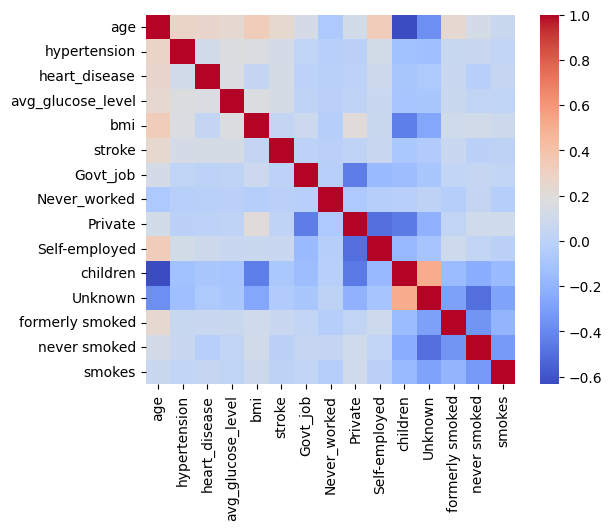

In [58]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

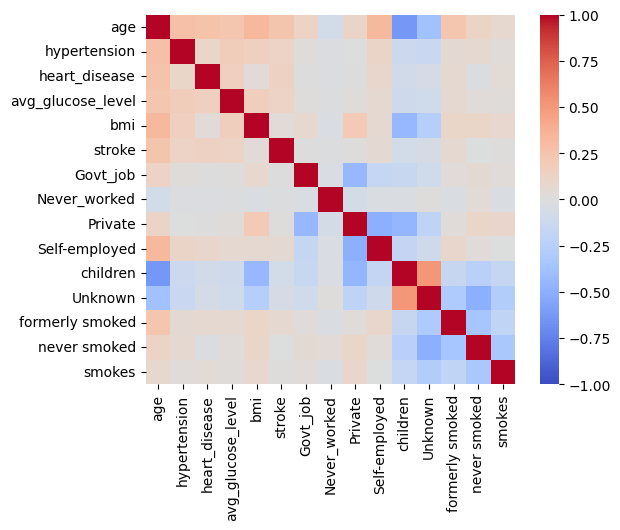

In [59]:
sns.heatmap(corr_mat, square=True, vmin = -1, vmax = 1, cmap ='coolwarm')
pass

Полученная корреляция яляется предсказуемой, например связь между малым возрастом и видом занятости "ребёнок" или увеличение количества людей состоящих в браке с повышением возраста.

Нормализуем количественные признаки:

In [61]:
data_raw['age'] = (data_raw['age'] - data_raw['age'].mean(axis=0))/data_raw['age'].std(axis=0)
data_raw['avg_glucose_level'] = (data_raw['avg_glucose_level'] - data_raw['avg_glucose_level'].mean(axis=0))/data_raw['avg_glucose_level'].std(axis=0)
data_raw['bmi'] = (data_raw['bmi'] - data_raw['bmi'].mean(axis=0))/data_raw['bmi'].std(axis=0)

In [62]:
data_raw.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
count,5.110000e+03,5110.000000,5110.000000,5.110000e+03,5.110000e+03,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,3.893385e-17,0.097456,0.054012,1.001156e-16,-4.171484e-17,0.048728,0.128571,0.004305,0.572407,0.160274,0.134442,0.302153,0.173190,0.370254,0.154403
std,1.000000e+00,0.296607,0.226063,1.000000e+00,1.000000e+00,0.215320,0.334758,0.065480,0.494778,0.366896,0.341160,0.459236,0.378448,0.482920,0.361370
min,-1.908074e+00,0.000000,0.000000,-1.126848e+00,-2.410791e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.060363e-01,0.000000,0.000000,-6.382598e-01,-6.574445e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.842450e-02,0.000000,0.000000,-3.149637e-01,-9.897124e-02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.859932e-01,0.000000,0.000000,1.753909e-01,5.114531e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.714677e+00,1.000000,1.000000,3.656787e+00,8.927516e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Классификация

Разделим данные на обучающую и тестовую выборку с соотношением 3:1

In [63]:
import sklearn
import sklearn.model_selection
import sklearn.neighbors
import sklearn.ensemble

In [64]:
x = data_raw.drop(['stroke'], axis=1)
y = data_raw['stroke']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=43)

##K ближайших соседей

4 соседа

In [65]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=4)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.05167014613778706, Test: 0.0406885758998435


8 соседей

In [66]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=8)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.051931106471816285, Test: 0.03990610328638498


##Random forest

In [67]:
model = sklearn.ensemble.RandomForestClassifier()
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.0, Test: 0.0406885758998435


##Выводы

Алгоритм Radnom forest даёт ошибку близкую к алгоритму k ближайших соседей, наблюдаемая разница назодится в пределах погрешности.С увеличением числа соседей в алгоритме K ближайших соседей может повысится точность.